<a href="https://colab.research.google.com/github/sinyasco/Machine-Learning-using-Libraries/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler



**`Dataset source : https://archive.ics.uci.edu/`**

In [6]:
cols = [
    "fLength",
    "fWidth",
    "fSize",
    "fConc",
    "fConc1",
    "fAsym",
    "fM3Long",
    "fM3Trans",
    "fAlpha",
    "fDist",
    "class"
]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [7]:
df["class"] = (df["class"] == "g").astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


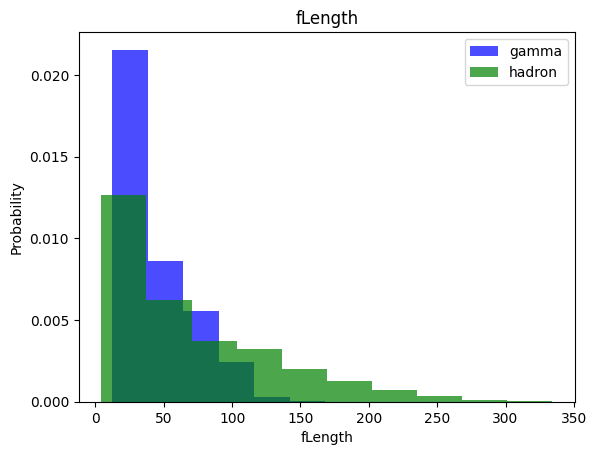

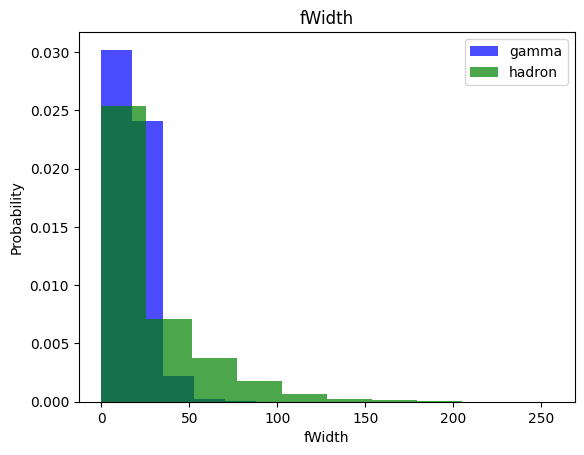

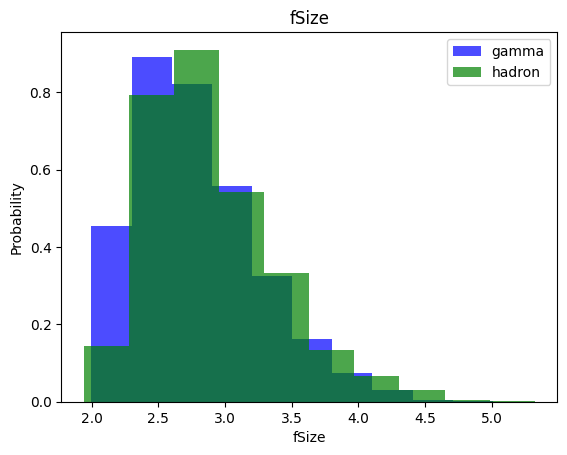

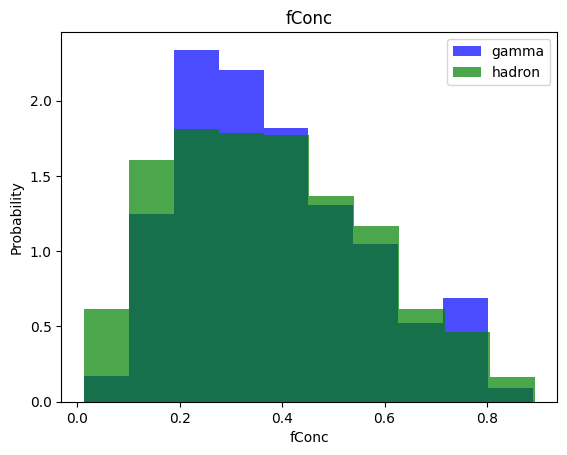

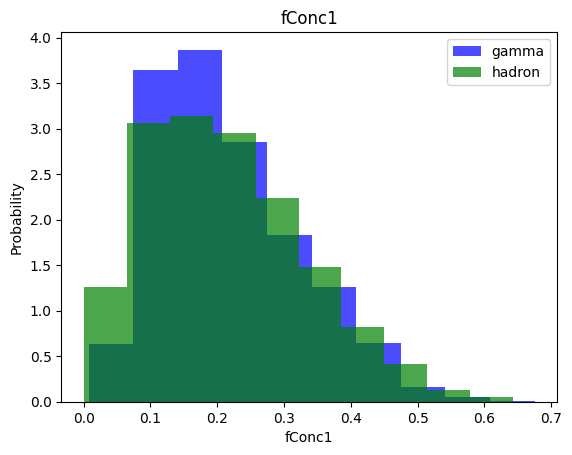

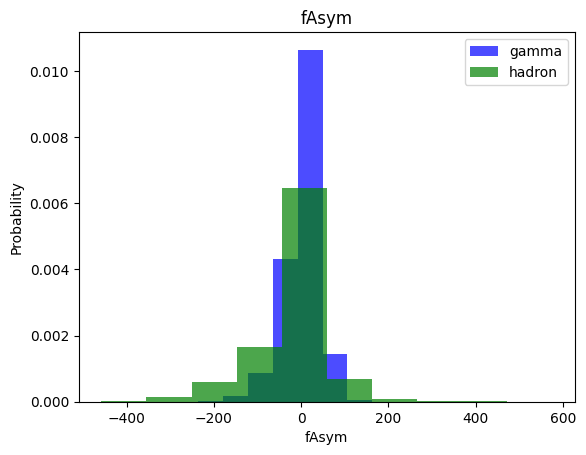

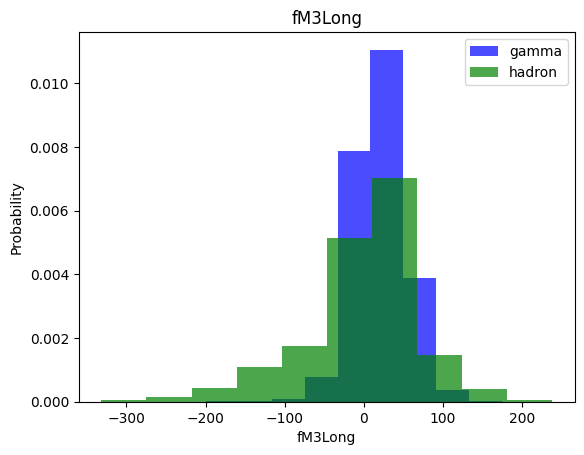

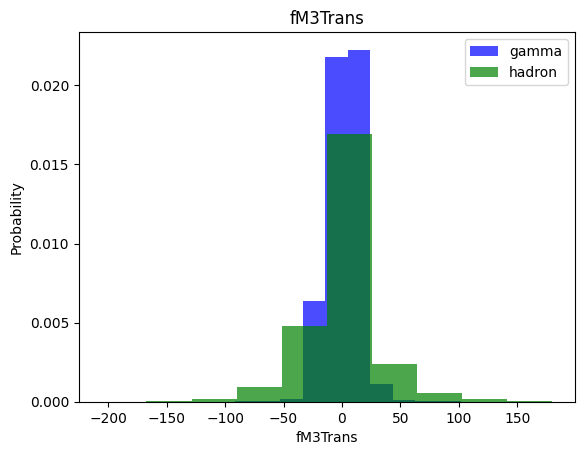

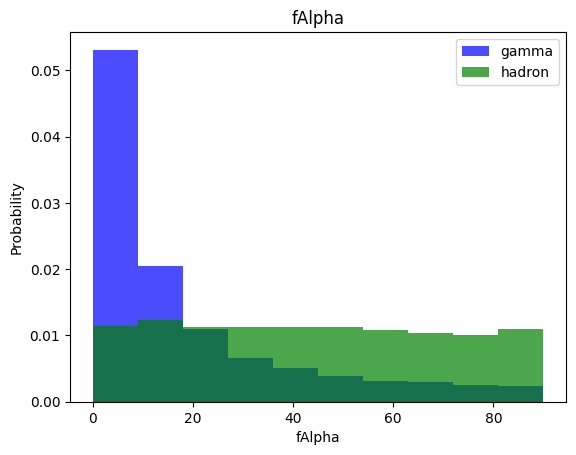

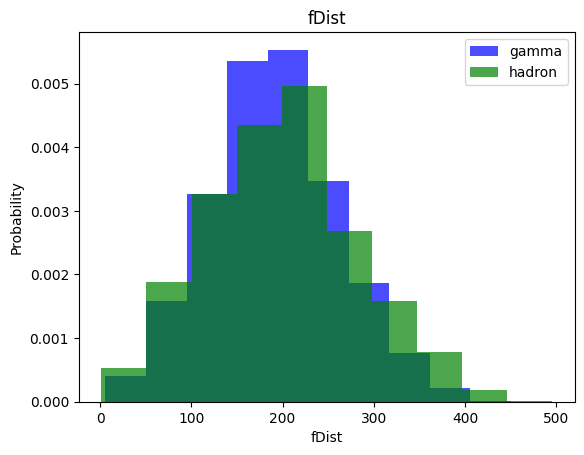

In [8]:
for label in cols[:-1]:
 plt.hist(df[df["class"] == 1][label], color='blue', label='gamma', alpha= 0.7, density=True)
 plt.hist(df[df["class"] == 0][label], color='green', label='hadron', alpha= 0.7, density=True)
 plt.title(label)
 plt.xlabel(label)
 plt.ylabel("Probability")
 plt.legend()
 plt.show()


In [9]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [10]:
print(len(train), len(valid), len(test))
print(len(df))


11412 3804 3804
19020


In [11]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  Y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X) #normalize Data

  if oversample:
   ros= RandomOverSampler()
   X,Y = ros.fit_resample(X,Y)

  data = np.hstack((X,np.reshape(Y,(-1,1))))

  return data,X,Y

In [12]:
train, X_train, Y_train = scale_dataset(train, oversample=True)
valid, X_valid, Y_valid = scale_dataset(valid, oversample=False)
test, X_test, Y_test = scale_dataset(test, oversample=False)


# **KNN**

# K Nearest Neighbors



In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
from sklearn.metrics import classification_report

In [15]:
knn_model = KNeighborsClassifier(3)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
y_predictions = knn_model.predict(X_test)

In [17]:
y_predictions

array([0, 0, 1, ..., 1, 1, 0])

In [18]:
Y_test

array([0, 1, 1, ..., 1, 0, 0])

In [19]:
print(classification_report(Y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1291
           1       0.86      0.85      0.86      2513

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# **Naive Bayes**

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
naiveBayes = GaussianNB()
naiveBayes.fit(X_train,Y_train)
predictedY = naiveBayes.predict(X_test)
print(classification_report(Y_test, predictedY))

              precision    recall  f1-score   support

           0       0.63      0.41      0.49      1291
           1       0.74      0.88      0.80      2513

    accuracy                           0.72      3804
   macro avg       0.69      0.64      0.65      3804
weighted avg       0.70      0.72      0.70      3804



# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [29]:
logisticReg = LogisticRegression()
logisticReg.fit(X_train,Y_train)
logisticPred = logisticReg.predict(X_test)
print(classification_report(Y_test, logisticPred))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1291
           1       0.85      0.81      0.83      2513

    accuracy                           0.78      3804
   macro avg       0.75      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



In [30]:
from sklearn.svm import SVC

In [31]:
svm_model = SVC()
svm_model.fit(X_train,Y_train)
SVMPredict = svm_model.predict(X_test)
print(classification_report(Y_test, SVMPredict))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1291
           1       0.89      0.89      0.89      2513

    accuracy                           0.85      3804
   macro avg       0.83      0.83      0.83      3804
weighted avg       0.85      0.85      0.85      3804

